<a href="https://colab.research.google.com/gist/1UC1F3R616/125b639953ab52110b8ba63cdaf322f8/livetwittersentimentanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Live Twitter Sentiment Analysis
- Data Mining Technique
- Social Media
- Represents the general public's sentiments

### Steps
- Installig Tweepy
- Creating Account and Twitter API
- Importing the libraries
- Connecting the Libraries
- Connecting with the Twitter API
- Iterate and Analyse the tweets data
- Print the result using Pie Chart

In [0]:
!pip install tweepy

In [0]:
!pip install textblob

In [0]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt

In [0]:
def percentage(part, whole):
  return 100 * float(part)/float(whole)

In [7]:
# Connecting with the Twitter API
from getpass import getpass
access_token = getpass('Enter the Twitter Access Token')
access_token_secret = getpass('Enter the Twitter Access Token Secret')

Enter the Twitter Access Token··········
Enter the Twitter Access Token Secret··········


In [8]:
API_KEY = getpass('Enter the Twitter API KEY')
API_SECRET_KEY = getpass('Enter the Twitter API KEY SECRET')

Enter the Twitter API KEY··········
Enter the Twitter API KEY SECRET··········


In [0]:
auth = tweepy.OAuthHandler(API_KEY, API_SECRET_KEY)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [58]:
searchTerm = input('Enter Keyword/Tag to search about: ')
NoOfTerms = int(input('Enter how many tweets to search: '))
tweets = tweepy.Cursor(api.search, q=searchTerm).items(NoOfTerms)

Enter Keyword/Tag to search about: corona
Enter how many tweets to search: 100


In [59]:
# Iterate and Analyse the tweets
a = TextBlob('I am a funny Cricket player')
a.sentiment.polarity

0.25

In [0]:
positive = 0
negative = 0
neutral = 0
polarity = 0

In [0]:
for tweet in tweets:
  analysis = TextBlob(tweet.text)
  sentiment = analysis.sentiment.polarity
  polarity += sentiment

  if sentiment < 0:
    negative += 1
  elif sentiment == 0:
    neutral += 1
  elif sentiment > 0:
    positive += 1

In [0]:
positivePercentage = float(format(percentage(positive, NoOfTerms), '.2f'))
negativePercentage = float(format(percentage(negative, NoOfTerms), '.2f'))
neutralPercentage  = float(format(percentage(neutral, NoOfTerms), '.2f'))
polarityPercentage = float(format(percentage(polarity, NoOfTerms), '.2f'))

In [63]:
print(type(positivePercentage))
print(positivePercentage)

<class 'float'>
14.0


In [64]:
print('How People are Reacting on '+ searchTerm + 'By Analyzing ' + str(NoOfTerms) + ' Tweets')

if polarityPercentage < 0.00:
  print('Negative')
elif polarityPercentage == 0:
  print('Neutral')
elif polarityPercentage > 0.00:
  print('Positive')

print('Polarity: ' + str(polarityPercentage))

How People are Reacting on coronaBy Analyzing 100 Tweets
Negative
Polarity: -0.66


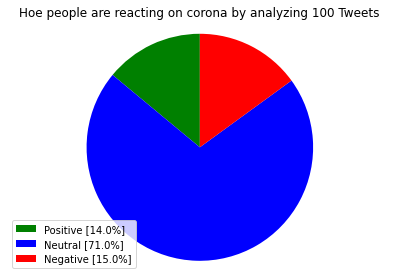

In [65]:
labels = ['Positive [{}%]'.format(positivePercentage),
  'Neutral [{}%]'.format(neutralPercentage),
  'Negative [{}%]'.format(negativePercentage)
]

sizes = [positivePercentage, neutralPercentage, negativePercentage]
colors = ['green', 'blue', 'red']
patches, texts = plt.pie(sizes, colors = colors, startangle=90)
plt.legend(patches, labels, loc='best')
plt.title('Hoe people are reacting on {} by analyzing {} Tweets'.format(searchTerm, NoOfTerms))
plt.axis('equal')
plt.tight_layout()
plt.show()